<a href="https://colab.research.google.com/github/laurauguc/bayesian_time_series/blob/main/Time_Series_with_Stan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1-eJW9npExNz7yY8Nkzwl8ilqayktu0QP?usp=sharing

In [1]:
# first need to install the forecast package (cannot do this after installing stan)
install.packages("forecast")
library("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# to install Stan first need to install the V8 package via the command line
system('sudo apt-get install -y libv8-dev')
# then install rstan in R folder on the Google server (see lib parameter)
install.packages("rstan", dependencies = T, repos = "https://cloud.r-project.org", lib = "/usr/lib/R/library",)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Download helpful files from the repo
#dir.create("stan", showWarnings = FALSE, recursive = TRUE)

In [4]:
library(rstan)
library(tidyr)
library(ggplot2)
library(stats)
#library(forecast)
#library(lmtest)

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

source("utils.R")
set.seed(123)

Loading required package: StanHeaders


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘tidyr’


The following object is masked from ‘package:rstan’:

    extract




In [5]:
example(stan_model, package = "rstan", run.dontrun = TRUE)


stn_md> stancode <- 'data {real y_mean;} parameters {real y;} model {y ~ normal(y_mean,1);}'

stn_md> mod <- stan_model(model_code = stancode, verbose = TRUE)

TRANSLATING MODEL '' FROM Stan CODE TO C++ CODE NOW.
OS: x86_64, linux-gnu; rstan: 2.32.6; Rcpp: 1.0.13.1; inline: 0.3.19 
 >> setting environment variables: 
PKG_LIBS =  '/usr/lib/R/library/rstan/lib//libStanServices.a' -L'/usr/lib/R/library/StanHeaders/lib/' -lStanHeaders -L'/usr/lib/R/library/RcppParallel/lib/' -ltbb 
PKG_CPPFLAGS =   -I"/usr/lib/R/site-library/Rcpp/include/"  -I"/usr/lib/R/library/RcppEigen/include/"  -I"/usr/lib/R/library/RcppEigen/include/unsupported"  -I"/usr/lib/R/library/BH/include" -I"/usr/lib/R/library/StanHeaders/include/src/"  -I"/usr/lib/R/library/StanHeaders/include/"  -I"/usr/lib/R/library/RcppParallel/include/"  -I"/usr/lib/R/library/rstan/include" -DEIGEN_NO_DEBUG  -DBOOST_DISABLE_ASSERTS  -DBOOST_PENDING_INTEGER_LOG2_HPP  -DSTAN_THREADS  -DUSE_STANC3 -DSTRICT_R_HEADERS  -DBOOST_PHOENIX_NO_VAR

In [6]:
size <- 1000 # size of simulation (including horizon)
h <- 200 # horizon for forecast

Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”


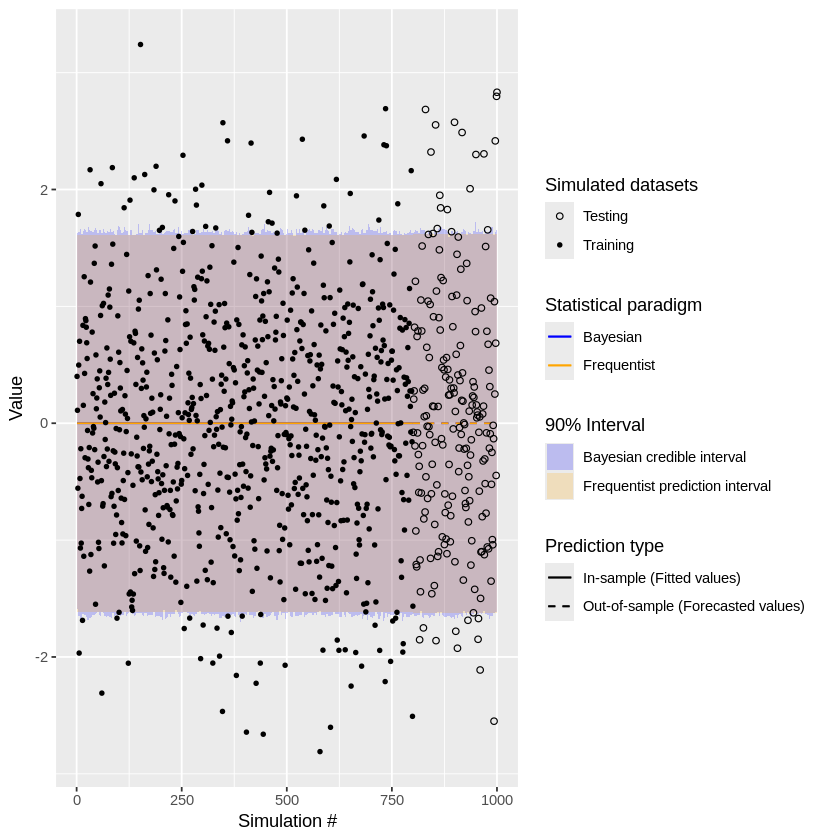

In [7]:
x <- rnorm(size)

x_observed <- x[1:(size - h)]
x_future <- x[(size-h+1):size]

order <- c(0, 0, 0)


frequentist_fit <- arima(x = x_observed, order = order, include.mean = FALSE)
bayesian_fit <- bayesian_arima(x = x_observed, order = order, h = h)


p1 <- comparison_plot(frequentist_fit, bayesian_fit, x_observed, x_future)
p1

In [8]:
parallel::detectCores()

[1] 2

Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”


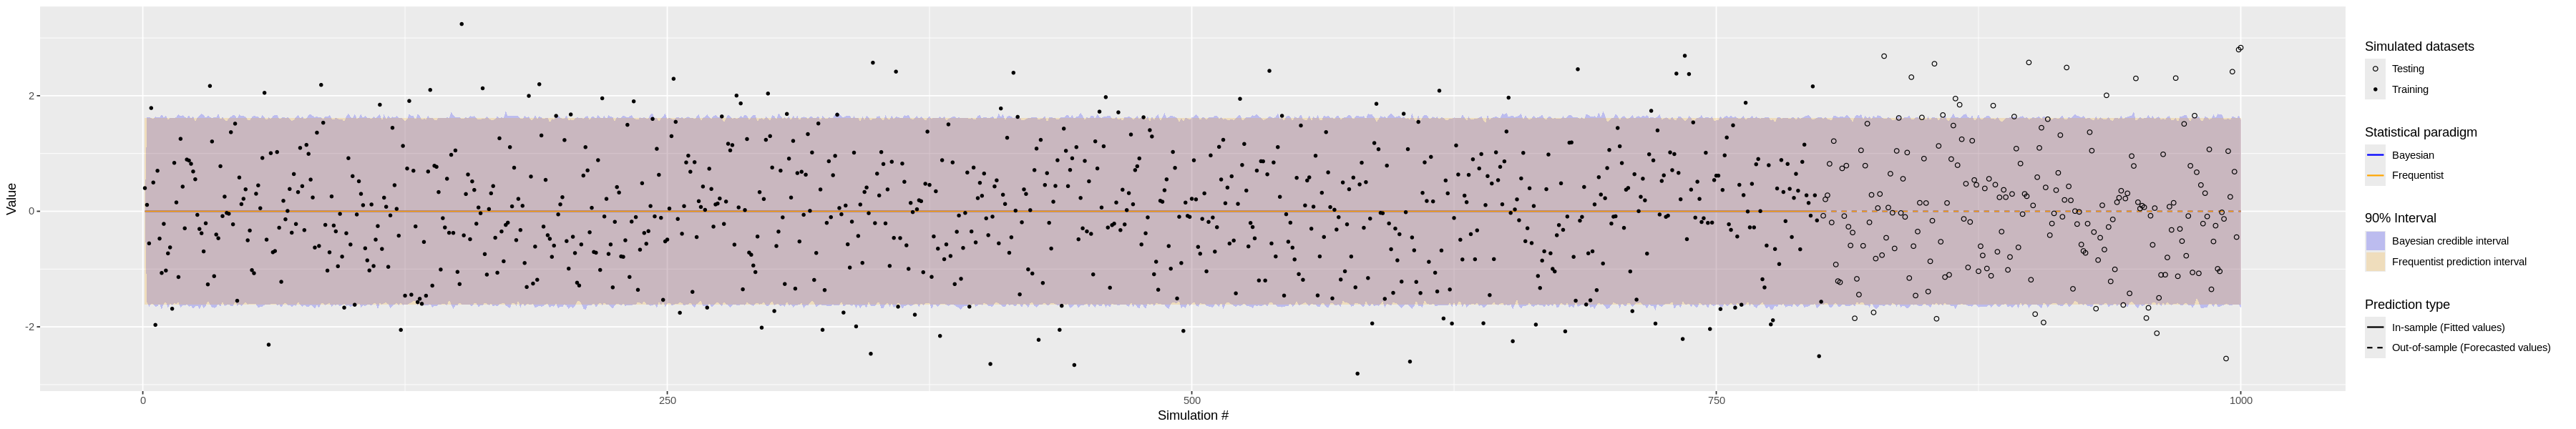

In [15]:
# prompt: make above chart wider

options(repr.plot.width=30, repr.plot.height = 20, repr.plot.height=5)
p1

Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 200 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 799 rows containing missing values or values outside the scale range
(`geom_line()`).”


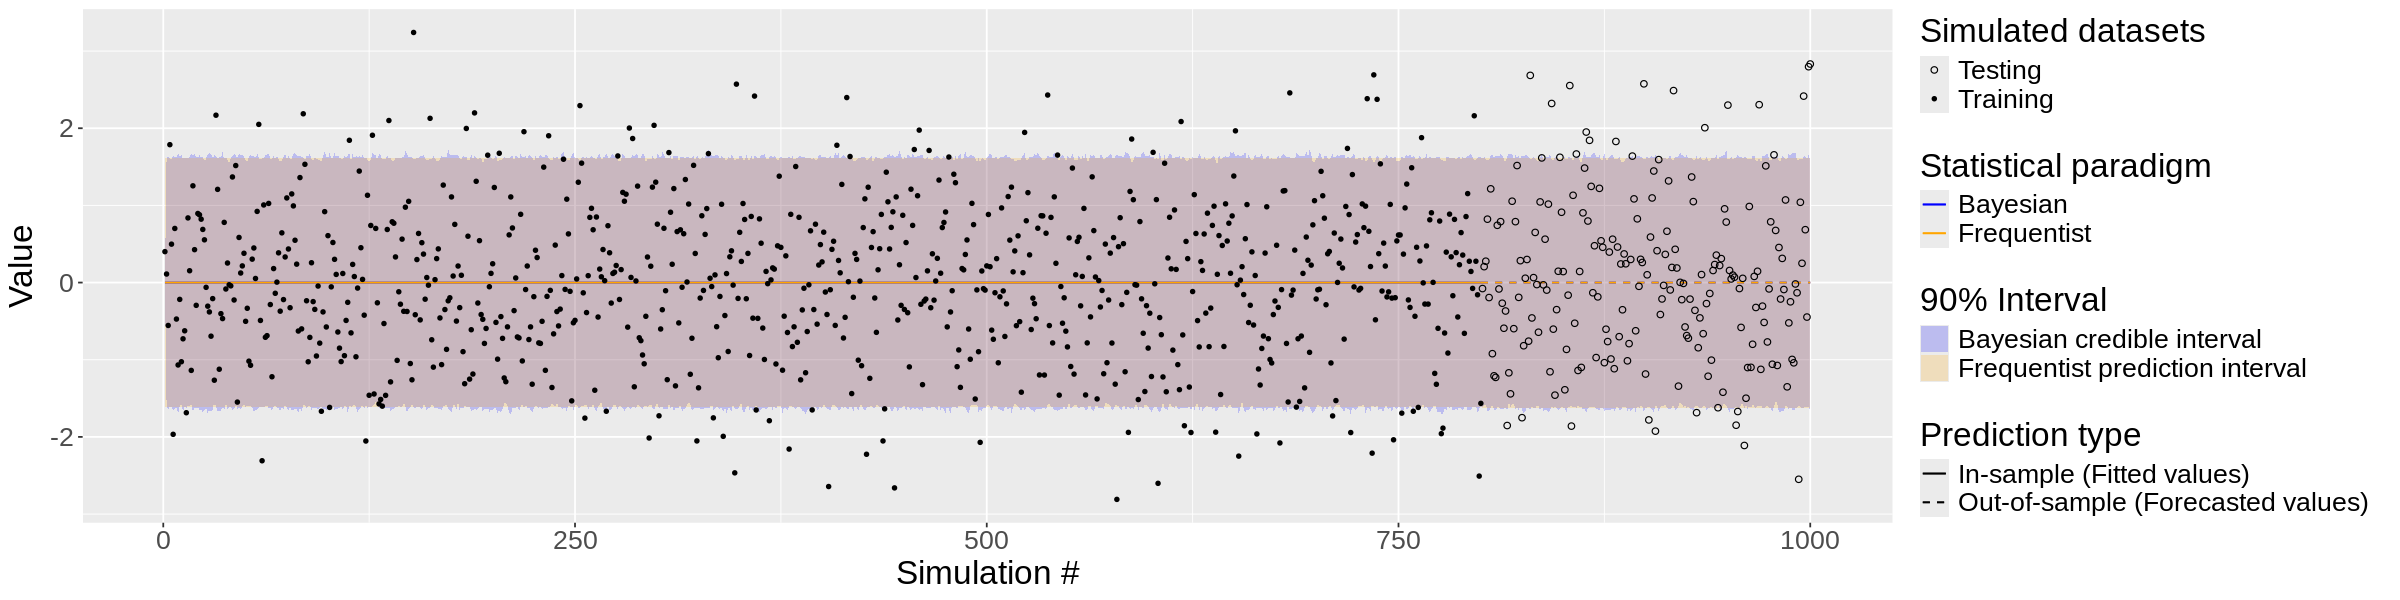

In [18]:
# prompt: make text in above visualization larger

options(repr.plot.width=20, repr.plot.height = 20, repr.plot.height=5)
p1 + theme(text = element_text(size = 20))